# Analysis of PolyaClassifier site definition for *A. thaliana*

**Purpose**: To identify 4mer motifs important to cleavage site definition in *A. thaliana* through a systematic mutation approach.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## IMPORTS AND SETUP

In [4]:
from paper_utilities import motifs

In [5]:
species   = 'arabidopsis_thaliana'
modeltype = 'polyaclassifier'
config    = 'polyaclassifier_bagging3_kmers-4'
kmer      = 4


In [6]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'polyaclassifier_motif_importance_atha_4mers')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


In [7]:
## Load model configuration information

with open(os.path.join(RESOURCES, 'polyaclassifier_configurations.pickle'), mode = 'rb') as handle:
    configurations = pickle.load(handle)

gold_sites = configurations[species][config]['golden_lines']
print("\nNumber of golden sites:", gold_sites)

mot_dis_dir = os.path.join(PROJECT, species, 'analysis', 'motif_analysis', 'motif_disruption', config)
print("\nDirectory containing motif disruption results:", mot_dis_dir)



Number of golden sites: 9358

Directory containing motif disruption results: /projects/b1080/eks/polyadenylation/yeast/arabidopsis_thaliana/analysis/motif_analysis/motif_disruption/polyaclassifier_bagging3_kmers-4


In [8]:
## Load motif family definitions for S. cerevisiae

atha_definitions = {'patterns' : {}}

# By pattern
for kmer in [4,5,6]:
    with open(os.path.join(RESOURCES, f'motif_definitions.atha.{kmer}mers.patterns.pickle'), mode = 'rb') as handle:
        atha_definitions['patterns'][kmer] = pickle.load(handle)


In [9]:
with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.significant_motifs.pickle'), mode = 'rb') as handle:
    significant_motifs = pickle.load(handle)
    
sigmots = significant_motifs[species][modeltype][config]
print(f"Significant motifs = {len(sigmots)}")


Significant motifs = 22


# ANALYSIS

In [10]:
family_cmap = {
    'A-rich'          : '#2278b5', 
    'T-rich'          : '#2fa148', 
    'TGTA-containing' : '#fcb316', 
    'Other'           : '#f7f8f8',
}

## Top individual motifs in each region

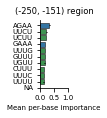

   motif  frequency     score   conf_lo   conf_hi  family  error_lo
5   AGAA       5464  0.336660  0.344384  0.328936  A-rich  0.007724
16  UUCU       5269  0.232452  0.240918  0.223986  T-rich  0.008466
12  UCUU       5375  0.218674  0.226977  0.210371  T-rich  0.008303
9   GAAA       4720  0.183358  0.191822  0.174895  A-rich  0.008463
20  UUUG       5836  0.177515  0.186033  0.168996  T-rich  0.008518
10  GUUU       5451  0.173525  0.182438  0.164613  T-rich  0.008912
14  UGUU       5494  0.167704  0.176170  0.159238  T-rich  0.008466
8   CUUU       4731  0.150611  0.160303  0.140918  T-rich  0.009693
19  UUUC       4654  0.145634  0.155038  0.136230  T-rich  0.009404
21  UUUU       4841  0.130284  0.139212  0.121356  T-rich  0.008928
0.3443835367221821


In [11]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][4]['family'], sigmots, 
                      (-250,-151), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,1), xtickint = 0.5, verbose = True
                     )


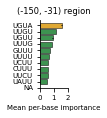

   motif  frequency     score   conf_lo   conf_hi           family  error_lo
13  UGUA       6777  1.549737  1.570196  1.529277  TGTA-containing  0.020459
17  UUGU       8571  1.170666  1.182922  1.158409           T-rich  0.012257
14  UGUU       8181  0.907856  0.917572  0.898139           T-rich  0.009717
20  UUUG       8521  0.862192  0.872212  0.852172           T-rich  0.010020
10  GUUU       8073  0.715522  0.724671  0.706372           T-rich  0.009150
21  UUUU       8259  0.672076  0.680608  0.663543           T-rich  0.008533
12  UCUU       7551  0.601958  0.611459  0.592456           T-rich  0.009501
8   CUUU       7513  0.597958  0.608197  0.587719           T-rich  0.010239
16  UUCU       7381  0.579255  0.588391  0.570119           T-rich  0.009136
11  UAUU       6604  0.488803  0.504247  0.473360           T-rich  0.015443
1.5701961845139563


In [12]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][4]['family'], sigmots, 
                      (-150,-31), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,2), xtickint = 1, verbose = True
                     )


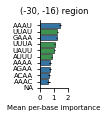

   motif  frequency     score   conf_lo   conf_hi  family  error_lo
2   AAAU       1924  1.428721  1.481357  1.376085  A-rich  0.052636
15  UUAU       2238  1.232207  1.270833  1.193582  T-rich  0.038626
9   GAAA       1153  1.189580  1.256697  1.122463  A-rich  0.067117
18  UUUA       2059  1.065333  1.108799  1.021867  T-rich  0.043466
11  UAUU       1721  1.024950  1.065560  0.984341  T-rich  0.040610
6   AUUU       2054  0.850643  0.886443  0.814844  T-rich  0.035799
0   AAAA       1091  0.744392  0.809330  0.679455  A-rich  0.064938
5   AGAA        788  0.741711  0.801374  0.682048  A-rich  0.059663
4   ACAA        642  0.651582  0.724724  0.578440  A-rich  0.073142
1   AAAC        745  0.612650  0.686832  0.538468  A-rich  0.074182
1.48135738816202


In [13]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][4]['family'], sigmots, 
                      (-30,-16), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,2), xtickint = 1, verbose = True
                     )


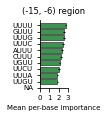

   motif  frequency     score   conf_lo   conf_hi  family  error_lo
21  UUUU       2889  2.786684  2.847121  2.726247  T-rich  0.060437
10  GUUU       2281  2.605082  2.679342  2.530822  T-rich  0.074260
20  UUUG       2463  2.590941  2.665772  2.516111  T-rich  0.074831
19  UUUC       1759  2.480916  2.572865  2.388968  T-rich  0.091949
6   AUUU       2259  2.360249  2.430325  2.290174  T-rich  0.070076
8   CUUU       1765  2.262893  2.342762  2.183024  T-rich  0.079869
14  UGUU       1927  2.120866  2.189761  2.051970  T-rich  0.068896
16  UUCU       1639  2.035323  2.110732  1.959913  T-rich  0.075410
18  UUUA       1403  1.873760  1.964508  1.783012  T-rich  0.090748
17  UUGU       1644  1.852608  1.922048  1.783168  T-rich  0.069440
2.8471207499344313


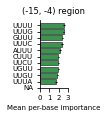

   motif  frequency     score   conf_lo   conf_hi  family  error_lo
21  UUUU       3103  2.586529  2.644584  2.528475  T-rich  0.058055
20  UUUG       2885  2.567791  2.634850  2.500731  T-rich  0.067060
10  GUUU       2477  2.392241  2.465573  2.318908  T-rich  0.073333
19  UUUC       2119  2.379701  2.460313  2.299088  T-rich  0.080612
6   AUUU       2425  2.172079  2.242339  2.101818  T-rich  0.070261
8   CUUU       1938  1.978718  2.059883  1.897553  T-rich  0.081165
16  UUCU       2078  1.978221  2.041154  1.915287  T-rich  0.062934
14  UGUU       2174  1.972857  2.035682  1.910032  T-rich  0.062825
17  UUGU       2064  1.858760  1.916792  1.800728  T-rich  0.058032
18  UUUA       1670  1.726699  1.808816  1.644582  T-rich  0.082117
2.6445840848327906


In [14]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][4]['family'], sigmots, 
                      (-15,-6), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )

motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][4]['family'], sigmots, 
                      (-15,-4), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )


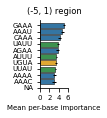

   motif  frequency     score   conf_lo   conf_hi           family  error_lo
9   GAAA        351  5.181205  5.480536  4.881875           A-rich  0.299331
2   AAAU        441  4.803929  5.083830  4.524028           A-rich  0.279901
7   CAAA        320  4.288827  4.602392  3.975263           A-rich  0.313565
11  UAUU        995  3.834929  3.997240  3.672618           T-rich  0.162311
5   AGAA        220  3.805334  4.074914  3.535754           A-rich  0.269580
6   AUUU       1069  3.522649  3.693974  3.351324           T-rich  0.171325
13  UGUA        377  3.489169  3.763268  3.215069  TGTA-containing  0.274100
15  UUAU       1240  3.259369  3.386360  3.132378           T-rich  0.126991
0   AAAA        380  3.105573  3.371086  2.840060           A-rich  0.265513
1   AAAC        228  2.997755  3.495851  2.499659           A-rich  0.498096
5.480536133642658


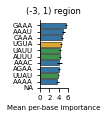

   motif  frequency     score   conf_lo   conf_hi           family  error_lo
9   GAAA        334  5.575197  5.822450  5.327945           A-rich  0.247253
2   AAAU        427  5.033415  5.298473  4.768356           A-rich  0.265059
7   CAAA        296  4.774806  5.043511  4.506101           A-rich  0.268705
13  UGUA        301  4.467334  4.695247  4.239420  TGTA-containing  0.227913
11  UAUU        889  4.351124  4.506593  4.195656           T-rich  0.155468
6   AUUU        885  4.338033  4.505157  4.170909           T-rich  0.167124
1   AAAC        179  4.170200  4.677568  3.662832           A-rich  0.507368
5   AGAA        212  4.045892  4.264646  3.827138           A-rich  0.218754
15  UUAU        996  3.975874  4.101520  3.850229           T-rich  0.125646
0   AAAA        367  3.741625  4.011678  3.471572           A-rich  0.270053
5.822450474452673


In [15]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][4]['family'], sigmots, 
                      (-5,1), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,6), xtickint = 2, verbose = True
                     )

motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][4]['family'], sigmots, 
                      (-3,1), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,6), xtickint = 2, verbose = True
                     )


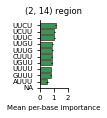

   motif  frequency     score   conf_lo   conf_hi  family  error_lo
16  UUCU       1871  1.126363  1.159078  1.093648  T-rich  0.032715
12  UCUU       2019  1.034175  1.061229  1.007120  T-rich  0.027055
19  UUUC       1736  1.022440  1.054003  0.990877  T-rich  0.031563
17  UUGU       1963  0.891194  0.927547  0.854842  T-rich  0.036352
20  UUUG       2200  0.877517  0.909446  0.845588  T-rich  0.031929
8   CUUU       1726  0.846538  0.872559  0.820518  T-rich  0.026021
14  UGUU       1920  0.846465  0.875499  0.817430  T-rich  0.029035
21  UUUU       2387  0.800623  0.823584  0.777662  T-rich  0.022961
10  GUUU       1799  0.761035  0.788952  0.733117  T-rich  0.027918
6   AUUU       1800  0.503688  0.554308  0.453067  T-rich  0.050620
1.1590783034014487


In [16]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][4]['family'], sigmots, 
                      (2,14), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,2), xtickint = 1, verbose = True
                     )


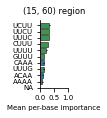

   motif  frequency     score   conf_lo   conf_hi  family  error_lo
12  UCUU       3678  0.334886  0.345209  0.324563  T-rich  0.010323
16  UUCU       3502  0.323872  0.335191  0.312554  T-rich  0.011319
19  UUUC       3534  0.322770  0.332957  0.312584  T-rich  0.010186
8   CUUU       3453  0.283830  0.294888  0.272773  T-rich  0.011058
21  UUUU       4465  0.227109  0.236016  0.218202  T-rich  0.008907
10  GUUU       3832  0.149886  0.159764  0.140008  T-rich  0.009878
7   CAAA       3238  0.130095  0.139197  0.120994  A-rich  0.009101
20  UUUG       4212  0.128720  0.139123  0.118316  T-rich  0.010404
4   ACAA       2653  0.097042  0.106521  0.087564  A-rich  0.009478
0   AAAA       3405  0.086365  0.096446  0.076284  A-rich  0.010081
0.34520857112561004


In [17]:
motifs.region_barplot(OUTDIR, mot_dis_dir, atha_definitions['patterns'][4]['family'], sigmots, 
                      (15,60), "mean", 95, method = "family", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,1), xtickint = 0.5, verbose = True
                     )
